Download the novel "Around the world in 80 days" by J. Verne from Project Gutenberg webstie. Find all cities visited by Phileas Fogg, the protagonist of the novel. Draw the path of his journey on a world map.

# Getting the book

Obtaining the text of the books is as easy as going to the Project Gutenberg website, searching the title and downloading the text file.

In [1]:
DATA_PATH = r'data/around_the_world_in_eighty_days.txt'

# Getting list of the cities

To see what words describe cities we will compare each word to a list of cities and keep those that match.

We will use the [Geonames](http://www.geonames.org/) database for list of all cities.

In [12]:
import pandas as pd

In [13]:
cities500 = pd.read_csv('data/cities500.txt', 
                        sep='\t', 
                        header=None, 
                        engine='python', 
                        encoding='utf-8')

Unfortunately we have to set the column names manually 

In [14]:
col_names = [
    'geonameid',
    'name',
    'asciiname',
    'alternatenames',
    'latitude',
    'longitude',
    'feature class',
    'feature code',
    'country code',
    'cc2',
    'admin1 code',
    'admin2 code',
    'admin3 code',
    'admin 4 code',
    'population',
    'elevation',
    'dem',
    'timezone',
    'modification date'
]

In [15]:
cities500.columns = col_names

Now we can investigate how the data frame looks like

In [17]:
cities500.sort_values(by='population', ascending =False).head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin 4 code,population,elevation,dem,timezone,modification date
21225,1796236,Shanghai,Shanghai,"SHA,San'nkae,Sanchajus,Sangaj,Sangay,Sanghaj,S...",31.22222,121.45806,P,PPLA,CN,NaN,23,NaN,NaN,NaN,22315474,NaN,12,Asia/Shanghai,2017-07-27
166458,745044,Istanbul,Istanbul,"Bizanc,Bizánc,Byzance,Byzantion,Byzantium,Byza...",41.01384,28.94966,P,PPLA,TR,NaN,34,NaN,NaN,NaN,14804116,NaN,39,Europe/Istanbul,2017-09-26
1358,3435910,Buenos Aires,Buenos Aires,"BUE,Baires,Bonaero,Bonaeropolis,Bonaëropolis,B...",-34.61315,-58.37723,P,PPLC,AR,NaN,07,NaN,NaN,NaN,13076300,NaN,31,America/Argentina/Buenos_Aires,2019-09-05
96210,1275339,Mumbai,Mumbai,"Asumumbay,BOM,Bombai,Bombaim,Bombaj,Bombay,Bom...",19.07283,72.88261,P,PPLA,IN,NaN,16,NaN,NaN,NaN,12691836,NaN,8,Asia/Kolkata,2019-09-05
117395,3530597,Mexico City,Mexico City,"Cidade de Mexico,Cidade de México,Cidade do Me...",19.42847,-99.12766,P,PPLC,MX,NaN,09,NaN,NaN,NaN,12294193,NaN,2240,America/Mexico_City,2019-03-15


We will also create a set of all unique cities to use in the comparison

In [18]:
cities = set(cities500['name'])

Now we can open the book, scan through the words and see which of those match any city

We all so use regular expression to filter out unnecessary characters.

In [20]:
import re

In [21]:
visited = []
with open(DATA_PATH, mode='r', encoding='utf-8') as file:
    for line in file:
        for word in line.split(' '):
            word = re.sub('[^\w]', '', word)  # Remove unnecessary characters
            if word in cities:
                visited.append(word)

We delete the duplicates (keeping the order)

In [22]:
visited = list(dict.fromkeys(visited))  # Remove duplicated remaining the order

In [23]:
visited

['Gutenberg',
 'Date',
 'English',
 'Burlington',
 'Sheridan',
 'Reform',
 'Byron',
 'City',
 'London',
 'Court',
 'Temple',
 'Grays',
 'Queens',
 'Forster',
 'Paris',
 'England',
 'Faith',
 'Angelica',
 'Leroy',
 'As',
 'Haymarket',
 'Reading',
 'Cheshire',
 'Stuart',
 'Sullivan',
 'Thomas',
 'Flanagan',
 'Well',
 'America',
 'Of',
 'Liverpool',
 'Glasgow',
 'Havre',
 'Suez',
 'Brindisi',
 'York',
 'Cut',
 'Peninsula',
 'Mont',
 'Bombay',
 'Calcutta',
 'Hong',
 'Kong',
 'Yokohama',
 'San',
 'Deal',
 'Dover',
 'Calais',
 'Continental',
 'Charing',
 'Sydenham',
 'West',
 'Alabama',
 'Post',
 'India',
 'Is',
 'Albemarle',
 'Police',
 'Scotland',
 'Send',
 'Oriental',
 'Stephenson',
 'Hope',
 'Port',
 'Said',
 'Four',
 'Aden',
 'Asia',
 'Atlantic',
 'Still',
 'Turin',
 'Singapore',
 'Egypt',
 'Lyons',
 'Never',
 'Goa',
 'Smith',
 'Bridge',
 'Point',
 'Gibraltar',
 'Solomon',
 'Madras',
 'Agra',
 'Ganges',
 'Malabar',
 'Hill',
 'Francis',
 'Cromarty',
 'Kali',
 'Ellora',
 'Greenwich',
 'Mu

As we can see many of those world could be recognized by cities just by accident.

# Filtering visited cities

Choose those cities from the `cities500`.

In [44]:
visited_df = cities500[cities500['name'].isin(visited)]

We assume that if there are multiple cities with the same name we take the one with greater population.

In [45]:
visited_df = visited_df.sort_values(by='population', ascending=False).drop_duplicates(subset='name')

In [46]:
visited_df.shape

(234, 19)

We are left with 234 cities!

If we filter further to cities with population of over 100 000.

In [47]:
visited_df = visited_df[visited_df['population'] > 100000]

We then unpack the names and coordinates

In [48]:
names = visited_df['name'].values
latitudes = visited_df['latitude'].values
longitudes = visited_df['longitude'].values

# Drawing on a world map

To draw the journey we will use `ipyleaflet`

In [49]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, Rectangle, Marker

# center = (52.204793, 360.121558)

watercolor = basemap_to_tiles(basemaps.Stamen.Watercolor)

# m = Map(layers=(watercolor, ), center=(0, 0), zoom=2)
m = Map(center = (0, 0), zoom=0)


# m = Map(center=center, zoom=0)

for x, y, name in zip(latitudes, longitudes, names):
    marker = Marker(location=(x, y), draggable=False, title=name)
    m.add_layer(marker)
    
    
# marker = Marker(location=center, draggable=False)
# m.add_layer(marker);

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [32]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [33]:
matplotlib.rcParams['figure.figsize'] = [12, 12]

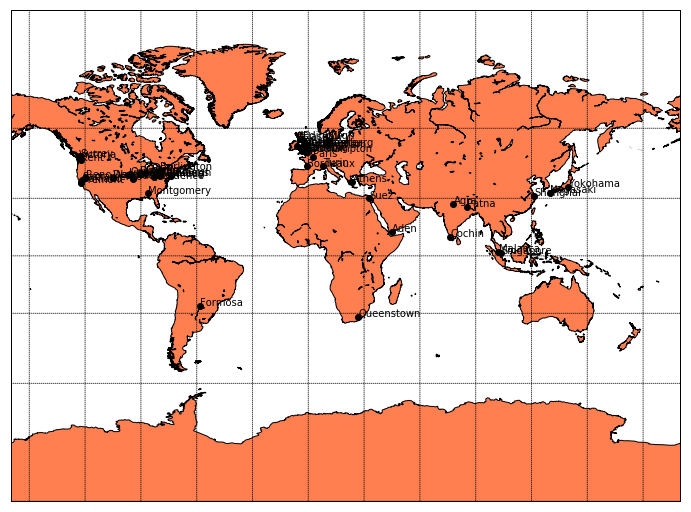

In [34]:
map = Basemap(projection='mill', lat_0=20, lon_0=20, resolution='l', area_thresh=1000.)

xs, ys = map(longitudes, latitudes)
map.plot(xs, ys, 'ko')

for x, y, name in zip(xs, ys, names):
    plt.text(x + 10 ** 4, y + 10 ** 4, name)

map.drawcoastlines()
map.drawcounties()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))
plt.savefig(fname='map1.png')
plt.show()